# Unit 5 - Financial Planning

In [62]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [63]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [64]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [65]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [66]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
#print(json.dumps(btc_response, indent=4, sort_keys=True))

btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]
print(f"BTC's current price is {btc_price}")
print()


# Fetch current ETH price
eth_response = requests.get(eth_url).json()
#print(json.dumps(eth_response, indent=4, sort_keys=True))

eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]
print(f"ETH's current price is {eth_price}")
print()


# Compute current value of my crpto
btc_wallet_value = my_btc * btc_price
eth_wallet_vale = my_eth * eth_price

total_crypto_value = btc_wallet_value + eth_wallet_vale

# Print current crypto wallet balance
print(f"The current value of my {my_btc} BTC is ${btc_wallet_value:0.2f} in Canadian Dollars.")
print()
print(f"The current value of my {my_eth} ETH is ${eth_wallet_vale:0.2f} in Canadian Dollars.")
print()
print(f"The current value of my crypto wallet is ${total_crypto_value:0.2f} in Canadian Dollars.")

BTC's current price is 43858.8682

ETH's current price is 3256.739346

The current value of my 1.2 BTC is $52630.64 in Canadian Dollars.

The current value of my 5.3 ETH is $17260.72 in Canadian Dollars.

The current value of my crypto wallet is $69891.36 in Canadian Dollars.


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [67]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [68]:
# Set Alpaca API key and secret
alpaca_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Your alpaca key is {alpaca_key}.")
print(f"Your alpaca secret key is {alpaca_secret_key}.")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_key, alpaca_secret_key, api_version="V2")

Your alpaca key is PKMWQL1LA14C1RK0ZTTC.
Your alpaca secret key is OnzURrqiO6snAtKkNF9K15QQQrQ4YTAi5w211ZhD.


In [69]:
# Format current date as ISO format
current_date = pd.Timestamp('2021-6-5', tz='America/New_York').isoformat()
print(f"Today's date formatted in ISO format is {current_date}.")

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG. Use a limit=1000 parameter to call the most recent 1000 days of data.
agg_spy_df = api.get_barset(tickers, timeframe=timeframe, limit=1000).df

# Preview DataFrame
agg_spy_df.tail()

Today's date formatted in ISO format is 2021-06-05T00:00:00-04:00.


AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2021-05-28 00:00:00-04:00  114.55  114.68  114.500  114.510  6186451.0   
2021-06-01 00:00:00-04:00  114.40  114.40  114.164  114.340  5655159.0   
2021-06-02 00:00:00-04:00  114.45  114.51  114.300  114.485  5649317.0   
2021-06-03 00:00:00-04:00  114.31  114.46  114.210  114.210  3270096.0   
2021-06-04 00:00:00-04:00  114.39  114.67  114.220  114.665  4334878.0   

                              SPY                                        
                             open    high       low   close      volume  
time                                                                     
2021-05-28 00:00:00-04:00  420.97  421.25  419.7900  420.02  49200328.0  
2021-06-01 00:00:00-04:00  422.57  422.72  419.2000  419.63  47607950.0  
2021-06-02 00:00:00-04:00  420.37  421.23  419.2900  420.38  41250387.0  
2021-06-03 00:00:00-04:00  417.87  419.99  416.2800  418.86  51582905.0  
2021-06-04 00:00:00-04:00  420.75  422.92  418.8422  422.57  45129316.0

In [70]:
# Pick AGG and SPY close prices
agg_close_price = agg_spy_df["AGG"]["close"]
#agg_close

spy_close_price = agg_spy_df["SPY"]["close"]
#spy_close

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $time
2017-06-14 00:00:00-04:00    109.950
2017-06-15 00:00:00-04:00    109.870
2017-06-16 00:00:00-04:00    109.945
2017-06-19 00:00:00-04:00    109.790
2017-06-20 00:00:00-04:00    109.975
                              ...   
2021-05-28 00:00:00-04:00    114.510
2021-06-01 00:00:00-04:00    114.340
2021-06-02 00:00:00-04:00    114.485
2021-06-03 00:00:00-04:00    114.210
2021-06-04 00:00:00-04:00    114.665
Name: close, Length: 1001, dtype: float64
Current SPY closing price: $time
2017-06-14 00:00:00-04:00       NaN
2017-06-15 00:00:00-04:00    243.79
2017-06-16 00:00:00-04:00    242.63
2017-06-19 00:00:00-04:00    244.64
2017-06-20 00:00:00-04:00    243.04
                              ...  
2021-05-28 00:00:00-04:00    420.02
2021-06-01 00:00:00-04:00    419.63
2021-06-02 00:00:00-04:00    420.38
2021-06-03 00:00:00-04:00    418.86
2021-06-04 00:00:00-04:00    422.57
Name: close, Length: 1001, dtype: float64


In [71]:
# Compute the current value of shares
last_close_agg = agg_spy_df["AGG"]["close"].iloc[-1]
print(f"The last close price for AGG is ${last_close_agg}.")
print()

last_close_spy = agg_spy_df["SPY"]["close"].iloc[-1]
print(f"The last close price for SPY is ${last_close_spy}.")
print()

curr_val_agg = my_agg * last_close_agg
curr_val_spy = my_spy * last_close_spy

total_shares_value = curr_val_agg + curr_val_spy

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${curr_val_agg:0.2f}")
print()
print(f"The current value of your {my_spy} SPY shares is ${curr_val_spy:0.2f}")
print()
print(f"The total shares value is ${total_shares_value:0.2f}")

The last close price for AGG is $114.665.

The last close price for SPY is $422.57.

The current value of your 200 AGG shares is $22933.00

The current value of your 50 SPY shares is $21128.50

The total shares value is $44061.50


### Savings Health Analysis

In [72]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
financial_assets = {
    'src': ['cyrpto', 'shares'],
    'amt': [total_crypto_value, total_shares_value]
}

# Create savings DataFrame
df_savings = pd.DataFrame(financial_assets)

df_savings = df_savings.set_index('src')

# Display savings DataFrame
df_savings.head()

,amt
src,
cyrpto,69891.360374
shares,44061.500000


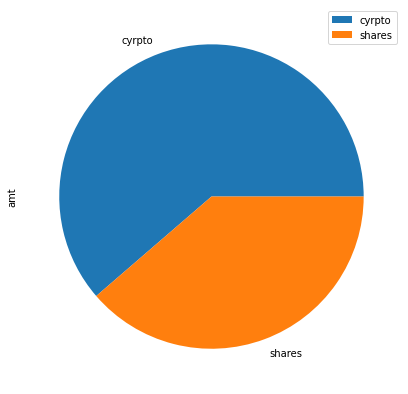

In [73]:
# Plot savings pie chart
pie_plot = df_savings.plot.pie(y='amt', figsize=(10,7))

In [74]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f"The emergency fund you need is ${emergency_fund}.")
print()

# Calculate total amount of savings
total_savings = total_crypto_value + total_shares_value
print(f"Your total savings is ${total_savings}.")
print()

# Validate saving health
if total_savings > emergency_fund:
    print(f"Contragulations on having enough in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations on being able to save to your emergency fund amount.")
elif total_savings < emergency_fund:
    print(f"You are ${emergency_fund - total_savings} short on your emergency fund.")

The emergency fund you need is $36000.

Your total savings is $113952.8603738.

Contragulations on having enough in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [75]:
# Set start and end dates of five years back from today. Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-06', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-06', tz='America/New_York').isoformat()

In [76]:
# Get 5 years' worth of historical data for SPY and AGG. Uuse a limit=1000 parameter to call the most recent 1000 days of data.
sym = ['AGG', 'SPY']

tf = '1D'

df_stock_data = api.get_barset(sym, timeframe=tf, start=start_date, end=end_date, limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-06-14 00:00:00-04:00  110.00  110.18  109.85  109.950  2304819.0     NaN   
2017-06-15 00:00:00-04:00  109.90  109.90  109.78  109.870  1938779.0  242.68   
2017-06-16 00:00:00-04:00  109.86  109.97  109.85  109.945  1709677.0  242.77   
2017-06-19 00:00:00-04:00  109.87  109.90  109.74  109.790  1375531.0  243.59   
2017-06-20 00:00:00-04:00  109.85  110.03  109.80  109.975  2010628.0  244.25   

                                                                 
                             high       low   close      volume  
time                                                             
2017-06-14 00:00:00-04:00     NaN       NaN     NaN         NaN  
2017-06-15 00:00:00-04:00  243.91  242.3600  243.79  51523068.0  
2017-06-16 00:00:00-04:00  242.83  241.6337  242.63  48998243.0  
2017-06-19 00:00:00-04:00  244.73  243.4800  244.64  42503652.0  
2017-06-20 00:00:00-04:00  244.26  242.9900  243.04  39203167.0

In [77]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_agg_spy = MCSimulation(portfolio_data=df_stock_data, weights=[0.6, 0.4], num_simulation=500, num_trading_days=30*252)

In [78]:
# Printing the simulation input data
MC_agg_spy.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-06-14 00:00:00-04:00  110.00  110.18  109.85  109.950  2304819.0   
2017-06-15 00:00:00-04:00  109.90  109.90  109.78  109.870  1938779.0   
2017-06-16 00:00:00-04:00  109.86  109.97  109.85  109.945  1709677.0   
2017-06-19 00:00:00-04:00  109.87  109.90  109.74  109.790  1375531.0   
2017-06-20 00:00:00-04:00  109.85  110.03  109.80  109.975  2010628.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2017-06-14 00:00:00-04:00          NaN     NaN     NaN       NaN     NaN   
2017-06-15 00:00:00-04:00    -0.000728  242.68  243.91  242.3600  243.79   
2017-06-16 00:00:00-04:00     0.000683  242.77  242.83  241.6337  242.63   
2017-06-19 00:00:00-04:00    -0.001410  243.59  244.73  243.4800  244.64   
2017-06-20 00:00:00-04:00     0.001685  244.25  244.26  242.9900  243.04   

                                                    
                               volume daily_return  
time                                                
2017-06-14 00:00:00-04:00         NaN          NaN  
2017-06-15 00:00:00-04:00  51523068.0          NaN  
2017-06-16 00:00:00-04:00  48998243.0    -0.004758  
2017-06-19 00:00:00-04:00  42503652.0     0.008284  
2017-06-20 00:00:00-04:00  39203167.0    -0.006540

In [79]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_agg_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999757,0.998887,0.991551,1.013229,1.009042,0.997417,0.992387,0.994784,0.998470,1.003637,...,1.003849,1.003457,0.998530,0.996795,0.998392,1.002011,0.994918,1.001182,0.995656,0.992448
2,0.999380,1.000303,0.991102,1.016512,1.007460,0.991853,0.994390,0.986187,1.010619,1.000006,...,1.000447,1.003351,1.004266,0.993792,1.007098,1.008396,0.987790,1.003200,1.002846,0.994860
3,0.998772,0.996318,0.988510,1.018096,1.009972,0.995408,0.991411,0.996614,1.007452,1.011485,...,0.999973,1.001486,1.001584,0.980835,1.002286,1.003946,0.976137,1.002604,1.002311,0.994779
4,0.988650,1.002928,0.993139,1.020844,1.008156,0.998367,0.992213,0.997428,1.013601,1.016960,...,1.010939,1.001735,0.998118,0.976651,1.008526,1.002485,0.972346,0.996510,0.999669,0.990416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.967824,6.251316,9.711410,14.363766,8.339704,7.357492,10.683588,11.719680,2.916199,9.612517,...,6.572951,9.690495,7.550146,11.690348,5.499355,11.009468,11.589187,4.724816,6.059187,11.459840
7557,5.979439,6.238743,9.742118,14.438068,8.396054,7.288094,10.736027,11.686556,2.926674,9.693256,...,6.584280,9.683214,7.591958,11.721278,5.422323,10.981607,11.690052,4.695565,6.037667,11.555776
7558,5.954785,6.219620,9.818457,14.667220,8.378534,7.270819,10.777770,11.714632,2.939968,9.631221,...,6.599150,9.738970,7.580530,11.691031,5.454363,10.953719,11.784289,4.725315,6.052971,11.569717
7559,6.037050,6.182244,9.721656,14.744693,8.478298,7.296711,10.831479,11.743462,2.946550,9.643160,...,6.607608,9.728174,7.607387,11.665852,5.411339,10.931766,11.719022,4.718724,6.053724,11.547239


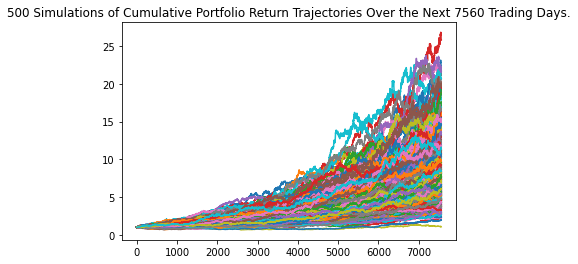

In [80]:
# Plot simulation outcomes
MC_agg_spy_line = MC_agg_spy.plot_simulation()

MC_agg_spy_line.get_figure().savefig('MC_agg_spy_simplot.png', bbox_inches='tight')

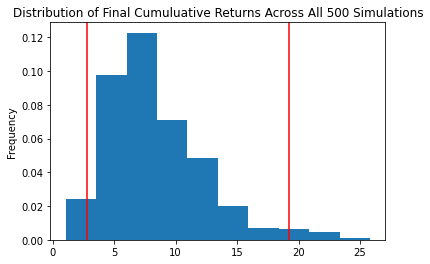

In [81]:
# Plot probability distribution and confidence intervals
MC_agg_spy_dist = MC_agg_spy.plot_distribution()

MC_agg_spy_dist.get_figure().savefig('MC_agg_spy_distplot.png', bbox_inches='tight')

### Retirement Analysis

In [82]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_agg_spy_summary = MC_agg_spy.summarize_cumulative_return()

# Print summary statistics
print(MC_agg_spy_summary)

count           500.000000
mean              8.362327
std               3.933917
min               1.056827
25%               5.563033
50%               7.678927
75%              10.434371
max              25.811208
95% CI Lower      2.828131
95% CI Upper     19.233508
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [83]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_agg_spy_summary[8] * initial_investment, 2)
ci_upper = round(MC_agg_spy_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $56562.61 and $384670.17


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [84]:
# Set initial investment
initial_investment_inc = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_agg_spy_summary[8] * initial_investment_inc, 2)
ci_upper = round(MC_agg_spy_summary[9] * initial_investment_inc, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_inc} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $84843.92 and $577005.25


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [85]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
own_tickers_5y = ['CSL', 'ELD', 'IVV']

start_date_own_5y = pd.Timestamp('2015-01-01', tz='America/New_York').isoformat()
end_date_own_5y = pd.Timestamp('2021-01-01', tz='America/New_York').isoformat()

own_5y_df = api.get_barset(own_tickers, timeframe='1D', start=start_date_own_5y, end=end_date_own_5y).df

own_5y_df.head()

CSL                                     ELD  \
                             open     high     low   close  volume   open   
time                                                                        
2020-08-11 00:00:00-04:00  129.65  131.550  127.60  127.82  823258  32.40   
2020-08-12 00:00:00-04:00  128.87  129.070  126.41  127.28  397080  32.68   
2020-08-13 00:00:00-04:00  126.00  127.540  125.46  126.47  294998  32.65   
2020-08-14 00:00:00-04:00  125.45  127.130  125.24  125.83  286432  32.75   
2020-08-17 00:00:00-04:00  125.15  127.285  124.89  126.51  603456  32.57   

                                                              IVV            \
                            high      low  close volume      open      high   
time                                                                          
2020-08-11 00:00:00-04:00  33.00  32.4000  32.53  35836  338.2400  338.8800   
2020-08-12 00:00:00-04:00  32.68  32.3300  32.66  13382  336.8500  339.6403   
2020-08-13 00:00:00-04:00  32.96  32.4284  32.66   9516  338.0000  339.6150   
2020-08-14 00:00:00-04:00  32.75  32.4210  32.60   7056  337.7601  338.7900   
2020-08-17 00:00:00-04:00  32.74  31.9200  32.20  17652  339.3200  339.7200   

                                                    
                              low   close   volume  
time                                                
2020-08-11 00:00:00-04:00  333.38  334.17  6594511  
2020-08-12 00:00:00-04:00  336.80  338.78  4941926  
2020-08-13 00:00:00-04:00  337.18  338.19  3816542  
2020-08-14 00:00:00-04:00  337.05  338.23  3195159  
2020-08-17 00:00:00-04:00  338.87  339.26  3190954

In [86]:
own_5y_MC = MCSimulation(portfolio_data=own_5y_df, weights=[0.4, 0.4, 0.2], num_simulation=500, num_trading_days=5*252)

In [87]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
own_5y_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000785,1.001020,0.994854,1.005218,0.997647,1.006318,1.016622,1.019127,0.999222,0.995689,...,1.002107,1.007128,1.000166,1.001579,1.009650,0.992917,1.005559,1.003307,1.002524,1.004319
2,0.992596,0.994761,0.995670,1.000974,0.991957,0.995050,1.016413,1.026377,0.985863,1.007368,...,1.011637,1.012892,1.000695,1.001852,1.015001,1.000686,1.022279,0.991942,1.012515,0.985745
3,1.001039,0.988372,1.000815,0.998582,0.990067,1.000737,1.012351,1.029704,0.979870,1.005581,...,1.026331,1.015571,0.993226,1.003685,1.024428,0.992049,1.028469,0.993697,1.002441,0.985539
4,1.008435,0.991390,0.997378,0.994531,1.000887,1.001745,0.995078,1.033579,0.974952,1.005289,...,1.040214,1.016534,0.988390,0.991294,1.039637,0.995226,1.029754,0.999459,1.000614,0.988111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.858528,5.017205,4.477098,7.234531,6.252740,5.853007,4.484513,9.482886,4.258886,6.335679,...,5.081371,4.959218,7.599779,9.147058,3.922263,4.011118,4.969957,3.841547,4.706714,5.911561
1257,4.896188,5.054111,4.510782,7.225136,6.269675,5.821902,4.520391,9.483457,4.303235,6.337934,...,5.121035,4.913352,7.685871,9.020660,3.921018,4.032487,4.967444,3.877379,4.666116,5.902787
1258,4.894845,5.086866,4.508593,7.137317,6.274540,5.761152,4.491652,9.507845,4.419224,6.280175,...,5.156121,4.893328,7.768258,9.210324,3.894160,4.030327,4.943236,3.880117,4.664961,5.913462
1259,4.932715,5.099392,4.527920,7.300819,6.328917,5.868190,4.525539,9.515611,4.385186,6.320186,...,5.162222,4.895664,7.774560,9.245434,3.898390,4.052463,5.002395,3.862339,4.680785,5.976664


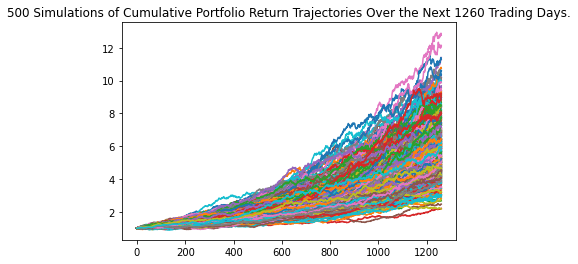

In [88]:
# Plot simulation outcomes
own_5y_MC_line = own_5y_MC.plot_simulation()

own_5y_MC_line.get_figure().savefig('own_5y_df_simplot.png', bbox_inches='tight')

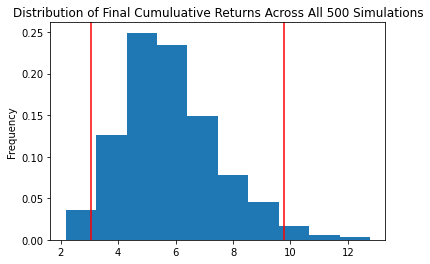

In [89]:
# Plot probability distribution and confidence intervals
own_5y_mc_dist = own_5y_MC.plot_distribution()

own_5y_mc_dist.get_figure().savefig('own_5y_df_distplot.png', bbox_inches='tight')

In [90]:
# Fetch summary statistics from the Monte Carlo simulation results
own_5y_df_summary = own_MC.summarize_cumulative_return()

# Print summary statistics
print(own_5y_df_summary)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [91]:
# Set initial investment
initial_5y_inv_own = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(own_5y_df_summary[8] * initial_5y_inv_own, 2)

ci_upper_five = round(own_5y_df_summary[9] * initial_5y_inv_own, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_5y_inv_own} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $64602.9 and $189197.21


### Ten Years Retirement Option

In [92]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
own_tickers_10y = ['CSL', 'ELD', 'IVV']

start_date_own_10y = pd.Timestamp('2015-1-1', tz='America/New_York').isoformat()
end_date_own_10y = pd.Timestamp('2021-1-1', tz='America/New_York').isoformat()

own_10y_df = api.get_barset(own_tickers_10y, start=start_date_own_10y, end=end_date_own_10y, timeframe='1D').df

own_10y_df.head()

CSL                                      ELD  \
                             open    high     low   close    volume   open   
time                                                                         
2020-08-07 00:00:00-04:00     NaN     NaN     NaN     NaN       NaN  32.80   
2020-08-10 00:00:00-04:00     NaN     NaN     NaN     NaN       NaN  32.50   
2020-08-11 00:00:00-04:00  129.65  131.55  127.60  127.82  821436.0  32.40   
2020-08-12 00:00:00-04:00  128.87  129.07  126.41  127.28  397080.0  32.68   
2020-08-13 00:00:00-04:00  126.00  127.54  125.46  126.47  148792.0    NaN   

                                                              IVV            \
                            high    low    close   volume    open      high   
time                                                                          
2020-08-07 00:00:00-04:00  32.80  32.45  32.5516  13486.0     NaN       NaN   
2020-08-10 00:00:00-04:00  33.00  32.50  32.6950   8996.0     NaN       NaN   
2020-08-11 00:00:00-04:00  33.00  32.40  32.5300  35836.0  338.24  338.8800   
2020-08-12 00:00:00-04:00  32.68  32.33  32.6600  13382.0  336.85  339.6403   
2020-08-13 00:00:00-04:00    NaN    NaN      NaN      NaN  338.00  339.6150   

                                                      
                              low   close     volume  
time                                                  
2020-08-07 00:00:00-04:00     NaN     NaN        NaN  
2020-08-10 00:00:00-04:00     NaN     NaN        NaN  
2020-08-11 00:00:00-04:00  333.38  334.17  6582583.0  
2020-08-12 00:00:00-04:00  336.80  338.78  4941926.0  
2020-08-13 00:00:00-04:00  337.18  338.19  1921392.0

In [93]:
own_10y_MC = MCSimulation(portfolio_data=own_10y_df, weights=[0.4, 0.4, 0.2], num_simulation=500, num_trading_days=252*10)

In [94]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
own_10y_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004263,1.015385,1.011291,1.005278,0.989103,0.992203,1.004884,1.003726,1.005067,0.992902,...,1.011745,0.991028,1.005273,0.992548,0.991284,1.010123,1.000317,1.006863,1.002714,0.999456
2,1.019084,1.019758,1.009198,1.007889,0.981711,1.004238,0.999322,0.996231,1.011089,0.989590,...,1.013148,0.993035,1.005540,0.992179,0.983147,1.018696,1.015048,1.009587,1.004805,0.999769
3,1.024247,1.020994,1.030033,1.017429,0.979496,0.992160,0.989259,0.999845,1.020965,0.995111,...,1.015878,0.987956,1.013989,1.007138,0.974263,1.022599,1.027914,1.026126,1.003629,1.004858
4,1.039396,1.026534,1.041973,1.020953,0.985674,1.005950,0.994747,1.015380,1.016326,0.990448,...,1.028584,0.975918,1.012101,1.001039,0.980780,1.028678,1.034070,1.027161,1.002869,1.002650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,64.429363,32.976465,82.453339,43.793500,25.293456,46.853171,69.586813,33.450558,22.727978,14.687306,...,59.244714,26.743769,26.124278,46.213868,49.797521,32.858322,18.141936,28.576179,26.915942,20.642860
2517,64.231407,33.205042,83.250637,43.803002,25.262766,47.486865,69.598856,33.974951,22.961069,14.725557,...,59.324721,26.742298,26.266569,46.637715,49.687029,33.193923,18.235464,28.779023,26.929549,20.592928
2518,64.378201,33.387158,83.717905,44.554339,24.972486,47.527754,69.813344,33.783060,22.678240,14.642052,...,59.715146,26.833036,25.992460,46.747145,49.838804,33.376683,18.267260,28.640400,26.532304,20.535279
2519,65.418201,33.632845,84.041238,44.661768,24.975931,47.110452,71.348609,33.705909,22.735633,14.553196,...,59.416946,26.989458,26.263700,46.501625,49.434218,33.302822,18.128978,28.505002,26.679129,20.567011


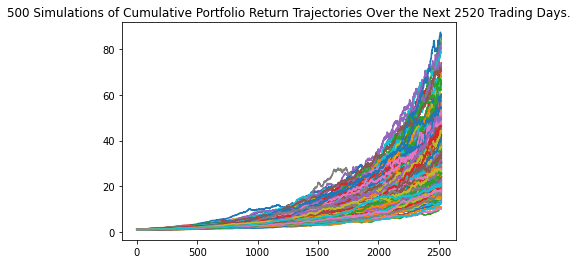

In [95]:
# Plot simulation outcomes
own_10y_MC_line = own_10y_MC.plot_simulation()

own_10y_MC_line.get_figure().savefig('own_10y_MC_simplot.png', bbox_inches='tight')

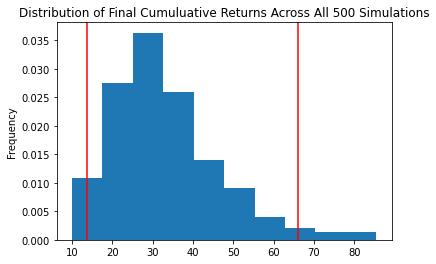

In [96]:
# Plot probability distribution and confidence intervals
own_10y_MC_dist = own_10y_MC.plot_distribution()

own_10y_MC_dist.get_figure().savefig('own_10y_MC_distplot.png', bbox_inches='tight')

In [97]:
# Fetch summary statistics from the Monte Carlo simulation results
own_10y_MC_summary = own_10y_MC.summarize_cumulative_return()

# Print summary statistics
print(own_10y_MC_summary)

count           500.000000
mean             33.190645
std              13.333579
min               9.998342
25%              23.714138
50%              30.929371
75%              39.507409
max              85.449897
95% CI Lower     13.718538
95% CI Upper     66.105590
Name: 2520, dtype: float64


In [98]:
# Set initial investment
initial_inv_own_10y = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10y = round(own_10y_MC_summary[8] * initial_inv_own_10y, 2)
ci_upper_10y = round(own_10y_MC_summary[9] * initial_inv_own_10y, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_inv_own_10y} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10y} and ${ci_upper_10y}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $274370.75 and $1322111.8
